In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
# data set, set features and target
data=pd.read_csv('Apple_data_20years.csv')

features= data[['Open','High','Low','Volume','SMA_10','EMA_5','MOM_5','ROC_12','ATR_14','MFI_10','OBV_10',"STO_10","STOK","MACD_10_26"]]


target=data['Close'];target=target.astype(float)
target=data['Close']



# rise or drop
data['change'] = data['Close']-data['Open']
data['up']= data['change']
data['up'][data['change']>=0] = 1
data['up'][data['change']<0] = -1
target1 = data['up']


C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_24360\2801471107.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['up'][data['change']>=0] = 1
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_24360\2801471107.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['up'][data['change']<0] = -1


In [5]:
#数据归一化处理
min_max_scaler = preprocessing.MinMaxScaler()#X_scaled = (X - X_min) / (X_max - X_min)
features = min_max_scaler.fit_transform(features)#两列数据转化
 

In [6]:
#数据集划分
split_num=int(len(features)*0.80)
X_train=features[:split_num]
Y_train=target[:split_num]
X_test=features[split_num:]
Y_test=target[split_num:]

Y_train1=target1[:split_num]
Y_test1=target1[split_num:]

# 2. price prediction

In [7]:
def cross_val(model, X, Y):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

In [8]:
def print_evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('__________________________________')

## 1.logistics

In [9]:
Y_train1[Y_train1==-1]=0
Y_test1[Y_test1==-1]=0

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train1)

test_proba = log_reg.predict_proba(X_test)
train_proba = log_reg.predict_proba(X_train)

test_pred = np.where(test_proba[:, 1] > 0.5, 1, 0)
train_pred = np.where(train_proba[:, 1] > 0.5, 1, 0)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)


Test set evaluation:
_____________________________________
MAE: 0.13786213786213786
MSE: 0.13786213786213786
RMSE: 0.37129790985425415
R2 Square: 0.44310421286031043
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.15971007248187952
MSE: 0.15971007248187952
RMSE: 0.3996374262777193
R2 Square: 0.3606852161649199
__________________________________


In [10]:
np.unique(Y_test1)

array([0., 1.])

In [11]:
np.unique(test_pred)

array([0, 1])

In [12]:
#test_pred = np.where(test_pred == 0, -1, 1)
#cal(Y_test1, test_pred)
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)
accuracy = accuracy_score(Y_test1, test_pred)
print("Test set Accuracy:", accuracy)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)
accuracy = accuracy_score(Y_train1, train_pred)
print("Train set Accuracy:", accuracy)
 
confusion = confusion_matrix(Y_test1, test_pred)
print("Confusion Matrix:")
print(confusion)

report = classification_report(Y_test1, test_pred)
print("Classification Report:")
print(report)

Test set evaluation:
_____________________________________
MAE: 0.13786213786213786
MSE: 0.13786213786213786
RMSE: 0.37129790985425415
R2 Square: 0.44310421286031043
__________________________________
Test set Accuracy: 0.8621378621378621
Train set evaluation:
_____________________________________
MAE: 0.15971007248187952
MSE: 0.15971007248187952
RMSE: 0.3996374262777193
R2 Square: 0.3606852161649199
__________________________________
Train set Accuracy: 0.8402899275181205
Confusion Matrix:
[[402  49]
 [ 89 461]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       451
         1.0       0.90      0.84      0.87       550

    accuracy                           0.86      1001
   macro avg       0.86      0.86      0.86      1001
weighted avg       0.87      0.86      0.86      1001



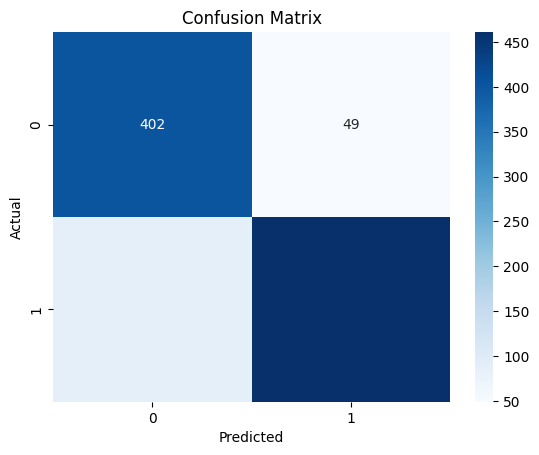

In [13]:
confusion = confusion_matrix(Y_test1, test_pred)

sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

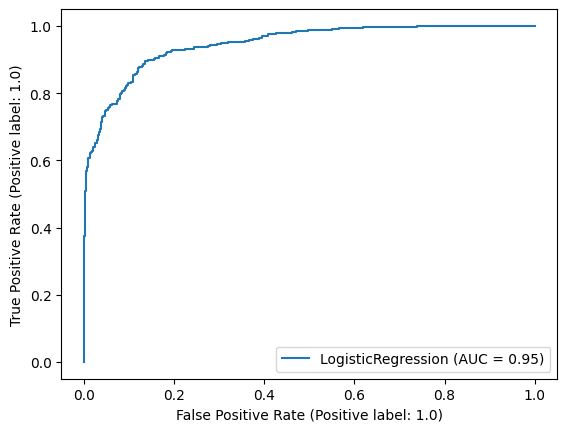

In [14]:
from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(log_reg, X_test,Y_test1)


###Prediction Error (MAE, MSE, RMSE): The model's prediction error is relatively small.

R2 Score: The R2 score measures the ability of a model to explain the variability of the target variable, with a range from 0 to 1. The model's R2 scores on the test set and training set are 0.443 and 0.361, respectively. This means that the model can explain about 36% to 44% of the variability of the target variable.

Accuracy: Accuracy is the proportion of samples that the model predicts correctly out of the total samples. The model's accuracy on the test set and training set are 86.2% and 84.0%, respectively. This means that the model can correctly predict most of the samples.

Confusion Matrix and Classification Report: The model's precision when predicting "down" (0) is 0.82, the recall is 0.89, and the F1 score is 0.85. When predicting "up" (1), the precision is 0.90, the recall is 0.84, and the F1 score is 0.87. This suggests that the model performs relatively well in predicting both "up" and "down", especially its performance is slightly better when predicting "up".

AUC: The AUC is the area under the ROC curve, a measure of the model's ability to distinguish between positive and negative classes, with a range from 0.5 (random prediction) to 1 (perfect prediction). The model's AUC is 0.95. This is a very good result, indicating that the model performs excellently in distinguishing between "up" and "down".

However, the model's performance on the training set is poor, and further optimization of the model or adjustment of the training process may be needed.

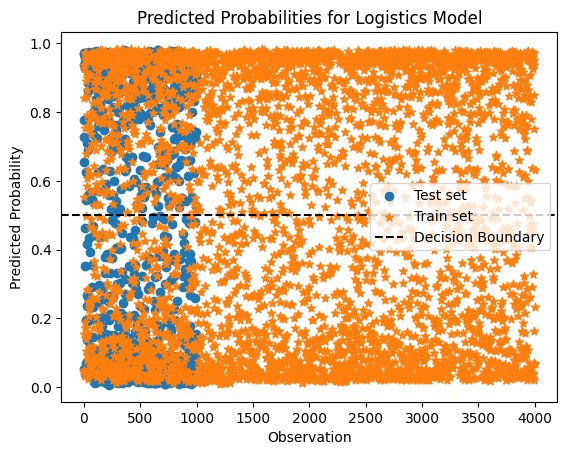

In [15]:
# logistics visual
#sns.set(font_scale=1.2)
#plt.rcParams['font.sans-serif'] = 'SimHei'
#plt.rcParams['axes.unicode_minus'] = False
#plt.rc('font', size=6)
test_index = np.arange(len(test_proba))
train_index = np.arange(len(train_proba))

test_pred_series = pd.Series(test_proba[:, 1], index=test_index)
train_pred_series = pd.Series(train_proba[:, 1], index=train_index)

# Plotting the predicted probabilities
plt.scatter(test_pred_series.index, test_pred_series.values, marker='o', label='Test set')
plt.scatter(train_pred_series.index, train_pred_series.values, marker='*', label='Train set')
plt.axhline(y=0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Observation')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Logistics Model')
plt.legend()
plt.show()

## 2.probit

In [16]:
Y_train1[Y_train1==-1]=0
Y_test1[Y_test1==-1]=0

probit_model = sm.Probit(Y_train1, X_train)
probit_result = probit_model.fit()

test_pred = probit_result.predict(X_test)
train_pred = probit_result.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)

Optimization terminated successfully.
         Current function value: 0.187652
         Iterations 11
Test set evaluation:
_____________________________________
MAE: 0.12040602763084012
MSE: 0.10676871323392702
RMSE: 0.3267548212864303
R2 Square: 0.5687064808340734
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.11479877013565665
MSE: 0.05467250066121228
RMSE: 0.23382151453878722
R2 Square: 0.7811475669706937
__________________________________


In [17]:
threshold = 0.5
binary_pred = np.where(test_pred > threshold, 1, 0)
binary_pred_train= np.where(train_pred > threshold, 1, 0)

In [18]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, binary_pred)
accuracy = accuracy_score(Y_test1, binary_pred)
print("Test set Accuracy:", accuracy)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, binary_pred_train)
accuracy = accuracy_score(Y_train1, binary_pred_train)
print("Train set Accuracy:", accuracy)
 
confusion = confusion_matrix(Y_test1, binary_pred)
print("Confusion Matrix:")
print(confusion)

report = classification_report(Y_test1, binary_pred)
print("Classification Report:")
print(report)

Test set evaluation:
_____________________________________
MAE: 0.11688311688311688
MSE: 0.11688311688311688
RMSE: 0.34188172937891387
R2 Square: 0.5278492239467849
__________________________________
Test set Accuracy: 0.8831168831168831
Train set evaluation:
_____________________________________
MAE: 0.06848287928017996
MSE: 0.06848287928017996
RMSE: 0.2616923370681304
R2 Square: 0.7258650222679
__________________________________
Train set Accuracy: 0.9315171207198201
Confusion Matrix:
[[412  39]
 [ 78 472]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88       451
         1.0       0.92      0.86      0.89       550

    accuracy                           0.88      1001
   macro avg       0.88      0.89      0.88      1001
weighted avg       0.89      0.88      0.88      1001



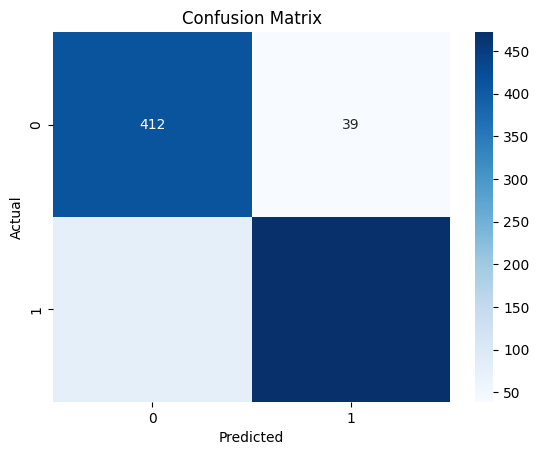

In [19]:
confusion = confusion_matrix(Y_test1, binary_pred)

sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

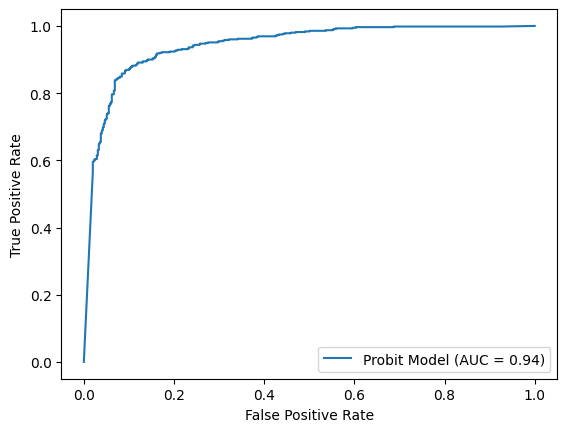

In [20]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, _ = roc_curve(Y_test1, test_pred)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Probit Model')
roc_display.plot()

###Prediction Error (MAE, MSE, RMSE): The model's prediction error is relatively small on the training set, but larger on the test set. This could be due to the model overfitting the training data during the training process, or differences in the data distribution between the training set and test set.

R2 Score: The R2 score measures the ability of a model to explain the variability of the target variable, with a range from 0 to 1. The model's R2 score on the test set is 0.528, while on the training set it is 0.726. This means that the model can explain about 72.6% of the variability of the target variable on the training set, but its performance decreases significantly on the test set.

Accuracy: Accuracy is the proportion of samples that the model predicts correctly out of the total samples. The model's accuracy on the test set is 88.3%, while on the training set it is 93.2%. This means that the model can correctly predict most of the samples.

Confusion Matrix and Classification Report: The model's precision when predicting "down" (0) is 0.84, the recall is 0.91, and the F1 score is 0.88. When predicting "up" (1), the precision is 0.92, the recall is 0.86, and the F1 score is 0.89. This suggests that the model performs relatively well in predicting both "up" and "down", especially its performance is slightly better when predicting "up".

AUC: The AUC is the area under the ROC curve, a measure of the model's ability to distinguish between positive and negative classes, with a range from 0.5 (random prediction) to 1 (perfect prediction). The model's AUC is 0.94. This is a very good result, indicating that the model performs excellently in distinguishing between "up" and "down".

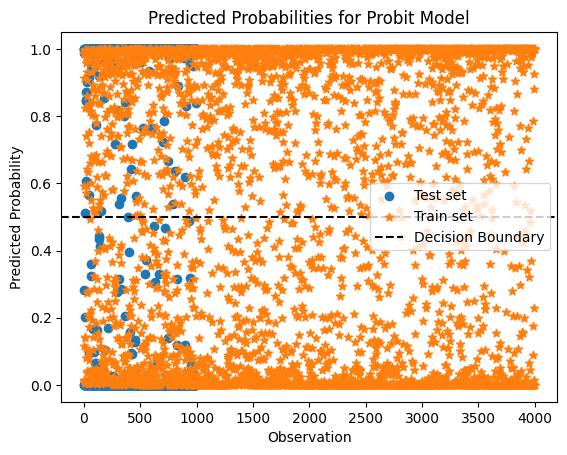

In [21]:
# probit visual
#sns.set(font_scale=1.2)
#plt.rcParams['font.sans-serif'] = 'SimHei'
#plt.rcParams['axes.unicode_minus'] = False
#plt.rc('font', size=6)

# Create index for test_pred and train_pred
test_index = np.arange(len(test_pred))
train_index = np.arange(len(train_pred))

# Convert test_pred and train_pred to pandas Series
test_pred_series = pd.Series(test_pred, index=test_index)
train_pred_series = pd.Series(train_pred, index=train_index)

# Plotting the predicted probabilities
plt.scatter(test_pred_series.index, test_pred_series.values, marker='o', label='Test set')
plt.scatter(train_pred_series.index, train_pred_series.values, marker='*', label='Train set')
plt.axhline(y=0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Observation')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Probit Model')
plt.legend()
plt.show()

###Whether in small samples or in large and ultra-large samples, the performance of the Probit regression model is better than the Logistic regression model. This could be because the Probit regression model is more suitable for the data, or the data distribution is closer to the normal distribution under the Probit link function. However, this does not mean that the Probit regression model is always superior to the Logistic regression model in all situations. Which model is better depends on the characteristics of the data and the specific needs of the problem.